# Tree-Based Model in Machine Learning with Classification and Regression Tree (CART)

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datasets
breast_cancer = pd.read_csv('data/wbc.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:xlabel='radius_mean', ylabel='concave points_mean'>

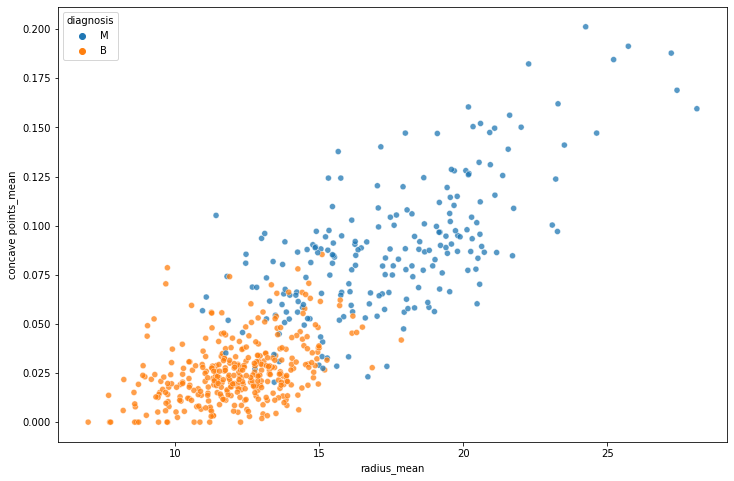

In [3]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='radius_mean', y='concave points_mean', hue='diagnosis', data=breast_cancer, alpha=0.75)

In [4]:
# select features and label
X = breast_cancer.loc[:,['radius_mean', 'concave points_mean']].values
y = breast_cancer['diagnosis'].values

## Classification Tree using scikit-learn

In [5]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# model initialize
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [6]:
# fit training set
dt.fit(X_train, y_train)

# predict test set
y_pred = dt.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred)

0.9035087719298246

In [7]:
# different dt model
dt = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

# fit training set
dt.fit(X_train, y_train)

# predict test set
y_pred = dt.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred) 
# acccuracy score is higher

0.9210526315789473

## Decision tree for Regression

In [8]:
# dataset
auto_mpg = pd.read_csv('data/csv/auto.csv')
auto_mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


<AxesSubplot:xlabel='displ', ylabel='mpg'>

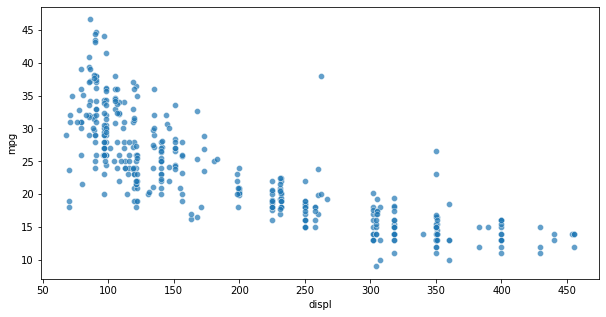

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='displ', y='mpg', alpha=0.7, data=auto_mpg)

In [10]:
auto_mpg = pd.get_dummies(auto_mpg)
auto_mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [11]:
X = auto_mpg.drop(columns='mpg')
y = auto_mpg['mpg']

In [12]:
# import library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# initialize model
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [13]:
# fit training set
dt.fit(X_train, y_train)

# predict test set
y_pred = dt.predict(X_test)

# MSE test
mse_dt = MSE(y_test, y_pred)

# rmse_dt
rmse_dt = mse_dt**(1/2)
rmse_dt

4.697042846107747

# Ensemble Learning in Classification

In [14]:
# breast cancer
X = breast_cancer.loc[:,['radius_mean', 'concave points_mean']]
y = breast_cancer['diagnosis']

In [15]:
# import library model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier


#Set seed for reproducibility
SEED = 1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify=y, random_state= SEED)

lr = LogisticRegression(random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=27)
dt = DecisionTreeClassifier(random_state=SEED)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbors', knn), ('Classification Tree', dt)]


In [17]:
# iterate over classifiers 
for clf_name, clf in classifiers:
    # fit data
    clf.fit(X_train, y_train)

    # predict data
    y_pred = clf.predict(X_test)

    # accuracy score each classifiers
    print(f'{clf_name} : {accuracy_score(y_test, y_pred)}')


Logistic Regression : 0.8771929824561403
K Nearest Neighbors : 0.8888888888888888
Classification Tree : 0.9005847953216374


In [18]:
# Voting classifiers
vc = VotingClassifier(estimators=classifiers)

# fit data
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print(f'Voting Classifier : {accuracy_score(y_test, y_pred)}')

Voting Classifier : 0.8888888888888888


# Random Forest

In [25]:
# import library
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Auto dataset predicting miles per galoon consumption
X = auto_mpg.drop(columns='mpg')
y = auto_mpg['mpg']

In [27]:
SEED = 1

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [28]:
# initialize Random forest rf
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# fit data
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# rmse test
rmse_test = MSE(y_test, y_pred)**(1/2)

rmse_test

3.9783131439894097

<AxesSubplot:>

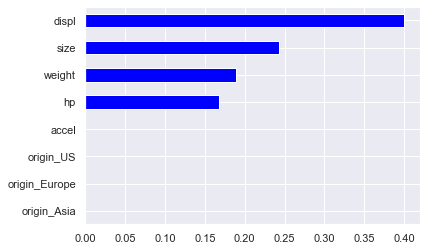

In [32]:
# most important features
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# sorted
importances_sorted = importances.sort_values()

# horizontal barplot
sns.set()
importances_sorted.plot(kind='barh', color='blue')

# Boosting 

In [36]:
# Adaboost : Adaptive Boosting, GB : Grarient Boosting
# import library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# CART Hyperparameters

In [37]:
# Import library
from sklearn.model_selection import GridSearchCV

In [40]:
# breast cancer
X = breast_cancer.loc[:,['radius_mean', 'concave points_mean']]
y = breast_cancer['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# define parameters
params_dt = {'max_depth':[2,3,4], 'min_samples_leaf':[0.12, 0.14, 0.16, 0.18]}

# initialize dt
dt = DecisionTreeClassifier()

In [51]:
# performs GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=1)

# fit data
grid_dt.fit(X_train, y_train)

print(f'Best Parameters : {grid_dt.best_params_}')
print(f'Best Score : {grid_dt.best_score_}')
print(f'Best Estimator : {grid_dt.best_estimator_}')

Best Parameters : {'max_depth': 4, 'min_samples_leaf': 0.18}
Best Score : 0.9593545312861987
Best Estimator : DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.18)
